In [1]:
import sys
import os
workspace_path = os.path.join(os.path.abspath(".."))
sys.path.append(workspace_path)
workspace_path

'c:\\Code\\job_discrimination_sandbox'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import re
import warnings
warnings.simplefilter("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.svm import SVC
from sklearn import tree, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from pandas.core.frame import DataFrame

In [3]:
pd.options.display.float_format = "{:.2f}".format

In [4]:
# Reading application statistics into dataframe
# filepath = os.path.join(workspace_path, "data", "cleaned_data", "applicants.csv")
# df = pd.read_csv(filepath)
# df


In [5]:
# Stripping job descriptions in dataframe from unnecessary parts
# job_descriptions_stripped = []
# for index, job in df["Job Description"].items():
#     try:
#         job = re.split(r'(^[^\d]+)', job)[1]
#         job = job.replace("(", "")
#         job = job.replace("-", "")
#         job = job.replace("'", "")
#         job = job.strip()
#     except IndexError:
#         pass
    
#     job_descriptions_stripped.append(job.upper())

# len(job_descriptions_stripped)

In [6]:
# Replacing job descriptions in dataframe with stripped versions
# df["Job Description"] = job_descriptions_stripped
# df 

In [7]:
# Fetching file names for job bulletins in folder with labeled bulletins
# Creating one list with full file names and one with stripped file names
# labeled_bulletins = []
# stripped_labeled_bulletins = []
# filepath = os.path.join(workspace_path, "data", "cleaned_data", "Job_Bulletins", "labeled")
# for bulletin in os.listdir(filepath):
#     try:
#         stripped = re.split(r'(^[^\d]+)', bulletin)[1]
#         stripped = stripped.replace("(", "")
#        stripped = stripped.replace("-", "")
#         stripped = stripped.replace("_", "")
#         stripped = stripped.strip()
#         stripped = stripped.upper()
#         if stripped in job_descriptions_stripped:
#             labeled_bulletins.append(bulletin)
#             stripped_labeled_bulletins.append(stripped)
#         elif stripped == "SENIOR ELECTRICAL TEST TECHNICIAN" or stripped == "WORKERS COMPENSATION CLAIMS ASSISTANT":
#             labeled_bulletins.append(bulletin)
#             stripped_labeled_bulletins.append(stripped)
#     except IndexError:
#         pass

In [8]:
# Creating a look up-dict to go from stripped file names to full file names
# dict_text = dict(zip(stripped_labeled_bulletins, labeled_bulletins))

In [9]:
# Getting full file names into dataframe
# file_names = [dict_text.get(value, None) for index, value in df["Job Description"].items()]
# df["File Names"] = file_names

In [10]:
# df

In [11]:
# Getting content from job bulletin files and putting it into dataframe
# contents = []
# for index, value in df["File Names"].items():
#     if value == None:
#         content = None
#     else:
#         file_path = os.path.join(workspace_path, "data", "cleaned_data", "Job_Bulletins","labeled", value)
#         with open(file_path) as f:
            # Remove newlines
#             content = f.read().replace("\n", " ")
            # Remove numbers
#             content = re.sub("\d", "", content)
#     contents.append(content)
# df["Content"] = contents
# df

In [12]:
# Create and add labels
# mostly_women = df["Female"] >= (df["Apps Received"] - df["Unknown_Gender"]) * 0.6
# mostly_men = df["Male"] >= (df["Apps Received"] - df["Unknown_Gender"]) * 0.6
# neutral = (df["Female"] < (df["Apps Received"] - df["Unknown_Gender"]) * 0.6) & (df["Female"] > (df["Apps Received"] - df["Unknown_Gender"]) * 0.4)

In [13]:
# labels = []
# for i in range(len(df)):
#     if mostly_women[i]:
#         label = "W"
#     elif mostly_men[i]:
#         label = "M"
#     elif neutral[i]:
#         label = "N"
#     else:
#         label = None
#     labels.append(label)
# df["Labels"] = labels


In [14]:
# df["Labels"].value_counts()

In [15]:
# df

In [16]:
# df.isnull().sum()

In [17]:
filepath = os.path.join(workspace_path, "data", "cleaned_data", "bulletins_w_labels_and_content.csv")
job_df = pd.read_csv(filepath)
job_df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...


In [18]:
job_df.loc[job_df['Label'] == "M", 'Label'] = 0
job_df.loc[job_df['Label'] == "N", 'Label'] = 1
job_df.loc[job_df['Label'] == "W", 'Label'] = 2
job_df

KeyError: 'Label'

In [19]:
job_df.dropna(how="any", inplace=True)
job_df.reset_index(inplace=True, drop=True)
job_df.drop(columns=["Apps Received", "Female", "Male", "Unknown_Gender", "Job Description", "File Names"], inplace=True)

In [ ]:
job_df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [21]:
job_df

,ID,Label 60/40,Numeric label 60/40,Label 70/30,Numeric label 70/30,Cleaned text,Text
0,9206,M,2,N,0,director class code open date annual salary du...,311 DIRECTOR Class Code: 9206 Open Date:...
1,1223,W,1,W,1,accounting clerk class code open date exam ope...,ACCOUNTING CLERK Class Code: 1223 Open ...
2,7260,M,2,M,2,airport manager class code open date exam open...,AIRPORT MANAGER Class Code: 7260 Open D...
3,3227,M,2,M,2,airport police lieutenant class code open date...,AIRPORT POLICE LIEUTENANT ...
4,2400,M,2,N,0,aquarist class code open date annual salary ca...,AQUARIST Class Code: 2400 Open Date: 05...
...,...,...,...,...,...,...,...
172,7840,M,2,N,0,wastewater treatment laboratory manager class ...,WASTEWATER TREATMENT LABORATORY MANAGER Class...
173,4123,M,2,M,2,wastewater treatment operator class code open ...,WASTEWATER TREATMENT OPERATOR Class Code: ...
174,7857,N,0,N,0,water microbiologist class code open date revi...,WATER MICROBIOLOGIST Class Code: 7857...
175,3912,M,2,M,2,water utility worker class code open date exam...,WATER UTILITY WORKER Class Code: 3912 Op...


In [23]:
X = job_df["Cleaned text"]
y = job_df["Numeric label 70/30"]

In [24]:
print(X.dtype)
print(y.dtype)

object
int64


In [25]:
vect = CountVectorizer(stop_words="english")

In [26]:
X = vect.fit_transform(X).todense()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [28]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)


int64
int64
int64
int64


In [29]:
# vectorizer = CountVectorizer(stop_words="english")
# BOW = vectorizer.fit_transform(df)
# X_train, X_test, y_train, y_test = train_test_split(BOW, np.asarray(df["Labels"]))

In [30]:
model = SVC(kernel="linear", probability=True)

In [31]:
model.fit(X_train, y_train.astype('int'))

SVC(kernel='linear', probability=True)

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2])

In [34]:
accuracy = accuracy_score(y_pred, y_test.astype('int')) * 100
print(f"Accuracy of the model is {'{:.2f}'.format(accuracy)}")

Accuracy of the model is 88.89


In [35]:
cm = confusion_matrix(y_true=y_test.astype('int'), y_pred=y_pred, labels=model.classes_)

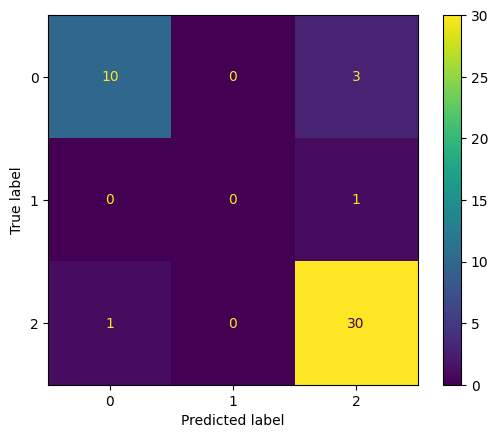

In [36]:
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plot.plot()
plt.show()

In [37]:
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.77777778, 0.61111111, 0.85714286, 0.91428571, 0.8       ])

In [38]:
# Standard deviation: The spread of values. 
# High standard deviation implies high spread of accuracies between cross-validation folds
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.79 accuracy with a standard deviation of 0.10


In [39]:
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
other_scores = cross_val_score(model, X, y, cv=cv)
other_scores

array([0.81481481, 0.90740741, 0.81481481, 0.81481481, 0.77777778])

In [40]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (other_scores.mean(), other_scores.std()))

0.83 accuracy with a standard deviation of 0.04


In [41]:
model.score(X_test, y_test)

0.8888888888888888

In [42]:
import shap

shap.initjs()
explainer = shap.KernelExplainer(model.predict, np.array(X_train[:3]))
shap_values = explainer.shap_values(np.array(X_test))
# shap.force_plot(explainer.expected_value[0], shap_values[0], np.array(X_test))


ModuleNotFoundError: No module named 'shap'

In [ ]:
len(np.array(shap_values))

3

In [ ]:
len(np.array(X_test))

45

In [ ]:
# from https://towardsdatascience.com/explain-nlp-models-with-lime-shap-5c5a9f84d59b
# import tensorflow as tf
from tensorflow.keras.preprocessing import text
# from tf.keras.preprocessing import text
from sklearn.preprocessing import MultiLabelBinarizer

tag_encoder = MultiLabelBinarizer()


num_explanations = 20
shap_vals = explainer.shap_values(np.array(X_test[:num_explanations]))

class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix




100%|██████████| 20/20 [01:24<00:00,  4.24s/it]


In [ ]:
y_train.values

array([1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=object)

In [ ]:
tag_encoder.fit([y_train.values])

MultiLabelBinarizer()

In [ ]:
tag_encoder.classes_

array([0, 1, 2])

In [ ]:
X_test.shape

(45, 3741)

Gör en CountVectorize för att få bort vanliga ord.

IndexError: list index out of range

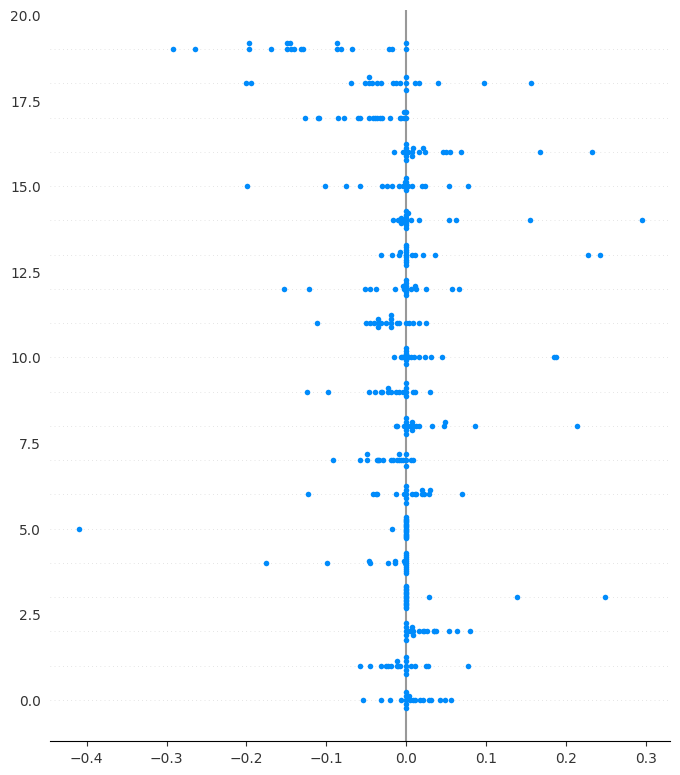

In [ ]:
VOCABSIZE = 500
processor = TextPreprocessor(VOCABSIZE)
processor.create_tokenizer(job_df.iloc[:10]["Cleaned text"].values)
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
    word_lookup.append(i)

word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=tag_encoder.classes_)

In [ ]:
shap.summary_plot(explainer.expected_value, np.array(X_test))

AttributeError: 'float' object has no attribute 'shape'

In [ ]:
shap_values

array([[ 0.        ,  0.        ,  0.        , ..., -0.0127763 ,
         0.        ,  0.        ],
       [ 0.        , -0.01489263,  0.        , ...,  0.01459022,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00838238,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.0002848 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00445722,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
len(shap_values)

3

In [ ]:
len(X_test[0])

1

In [ ]:
len(np.array(X_test)[0])

3741

In [ ]:
shap.force_plot(explainer.expected_value, [x[0] for x in shap_values], np.array(X_test)[0])

AssertionError: The shap_values arg looks multi output, try shap_values[i].

In [ ]:
explainer
print()

KeyboardInterrupt: 

In [ ]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

int64
int64
object
object
